In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Unzip the dataset

In [16]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/Leaf Dataset.zip'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Leaf Dataset.zip
replace Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (1).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (1).JPG  
replace Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (10).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (10).JPG  
replace Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (100).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (100).JPG  
replace Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (11).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (11).JPG  
replace Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (12).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: yy
  inflating: Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (12).JPG  
replace Leaf

# Importing Essential Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np

Base Directory

In [4]:
base_dir = r"/content/Leaf Dataset"

In [5]:
IMAGE_SIZE=224
BATCH_SIZE=64

#Loading Custom image dataset and Preprocess it
train=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

test=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.2
)

train=train.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test=test.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 880 images belonging to 11 classes.
Found 220 images belonging to 11 classes.


# Training and testing the dataset into X_train,X_test, y_train and y_test

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(test,test,test_size=0.2)

# Building Convolutional Neural Networks

In [7]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(11,activation='softmax')) #Activation function sigmoid is used to get accuracy

In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
r=cnn.fit(train,epochs=50,validation_data=test)

Epoch 1/50
14/14 [==============================] - 224s 16s/step - loss: 2.3697 - accuracy: 0.1091 - val_loss: 2.3666 - val_accuracy: 0.0909
Epoch 2/50
14/14 [==============================] - 208s 15s/step - loss: 2.3295 - accuracy: 0.0920 - val_loss: 2.3125 - val_accuracy: 0.1045
Epoch 3/50
14/14 [==============================] - 219s 15s/step - loss: 2.2423 - accuracy: 0.1716 - val_loss: 2.1916 - val_accuracy: 0.2091
Epoch 4/50
14/14 [==============================] - 209s 15s/step - loss: 2.0137 - accuracy: 0.3068 - val_loss: 1.8529 - val_accuracy: 0.4045
Epoch 5/50
14/14 [==============================] - 188s 14s/step - loss: 1.5680 - accuracy: 0.4739 - val_loss: 1.5651 - val_accuracy: 0.4909
Epoch 6/50
14/14 [==============================] - 215s 15s/step - loss: 1.3446 - accuracy: 0.4852 - val_loss: 1.3991 - val_accuracy: 0.5364
Epoch 7/50
14/14 [==============================] - 205s 15s/step - loss: 1.1797 - accuracy: 0.5784 - val_loss: 1.2107 - val_accuracy: 0.5636
Epoch 

In [10]:
train_loss, train_acc = cnn.evaluate_generator(train, steps= 16)
val_loss, val_acc = cnn.evaluate_generator(test, steps= 16)
print('Train accuracy : %.3f, Test accuracy : %.3f' % (train_acc,val_acc))

<ipython-input-10-fce72b911000>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss, train_acc = cnn.evaluate_generator(train, steps= 16)
<ipython-input-10-fce72b911000>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_acc = cnn.evaluate_generator(test, steps= 16)


Train accuracy : 0.923, Test accuracy : 0.836


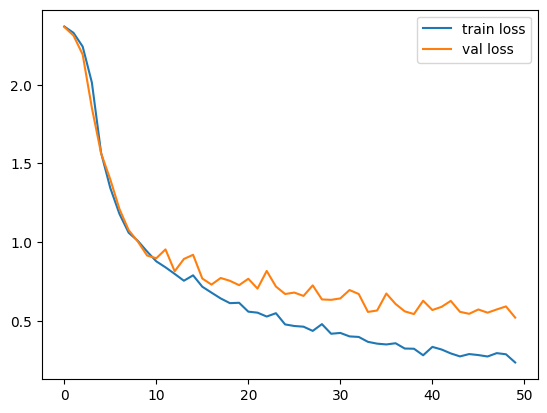

In [11]:
#plot the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

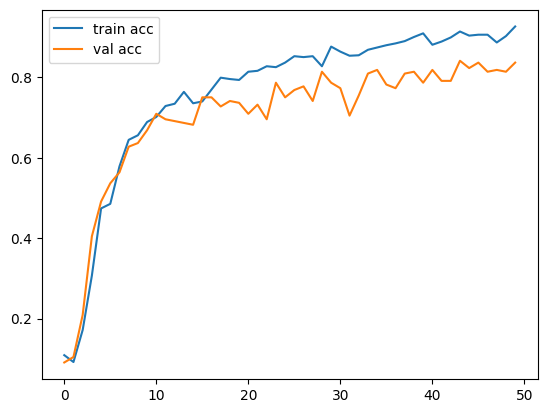

In [12]:
#plot the accuracy
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
#plt.savefig('Actual_acc')

In [17]:
cnn.save_weights('/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5')

# Predictions

1/1 [==============================] - 0s 328ms/step


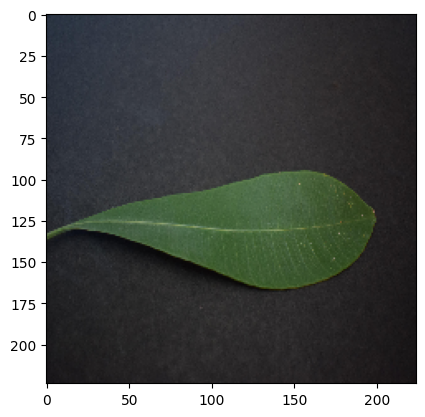

Predicted Class: Alstonia Scholaris


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Alstonia Scholaris/Alstonia Scholaris (18).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 93ms/step


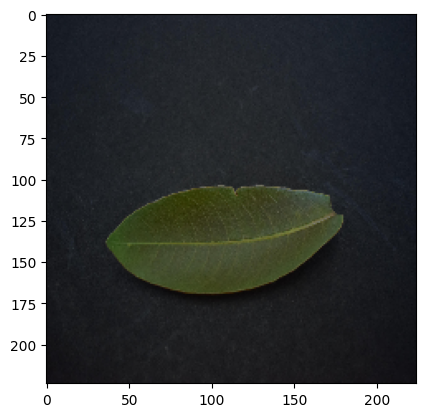

Predicted Class: Arjun


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Arjun/Arjun (36).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 29ms/step


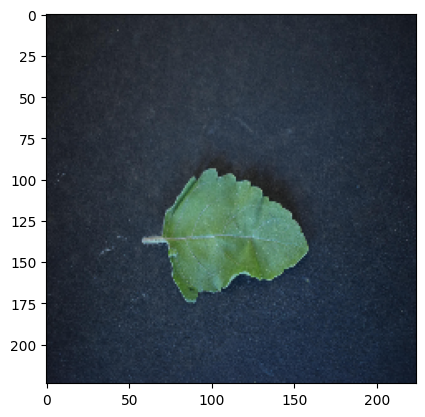

Predicted Class: Basil


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Basil/Basil (56).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 111ms/step


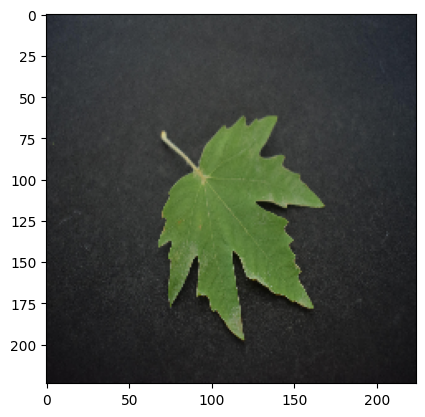

Predicted Class: Chinar


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Chinar/Chinar (89).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 26ms/step


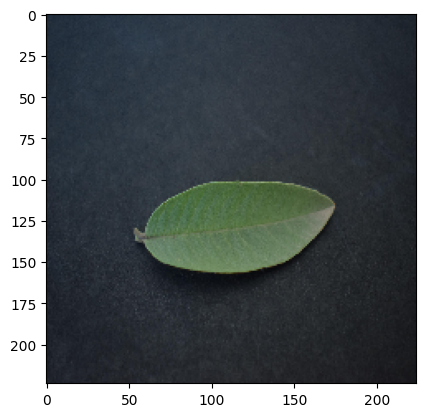

Predicted Class: Guava


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Gauva/Gauva (3).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 26ms/step


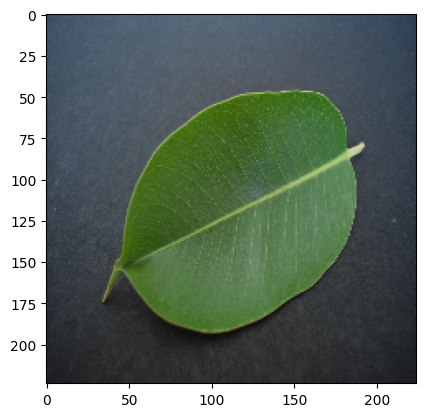

Predicted Class: Jamun


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Jamun/Jamun (65).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 26ms/step


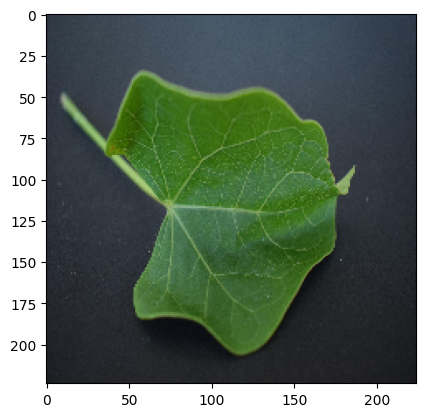

Predicted Class: Jatropha


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Jatropha/Jatropha (25).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 39ms/step


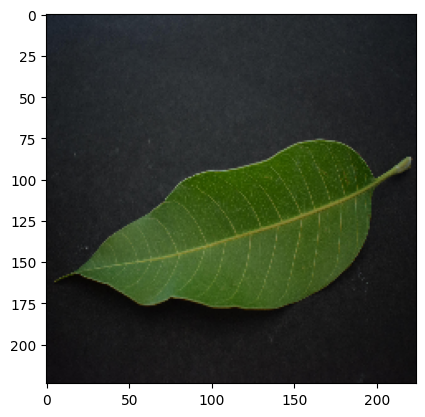

Predicted Class: Mango


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Mango/Mango (94).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 25ms/step


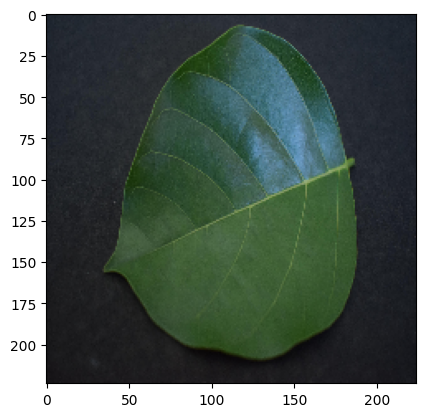

Predicted Class: Pongamia Pinnata


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Pongamia Pinnata/Pongamia Pinnata (99).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 42ms/step


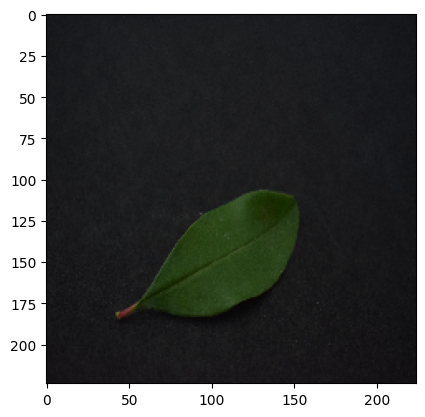

Predicted Class: Pomegranate


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Pomegranate/Pomegranate (55).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 44ms/step


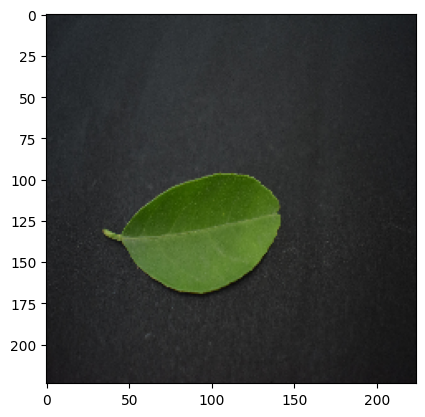

Predicted Class: Lemon


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Lemon/Lemon (100).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)


1/1 [==============================] - 0s 104ms/step


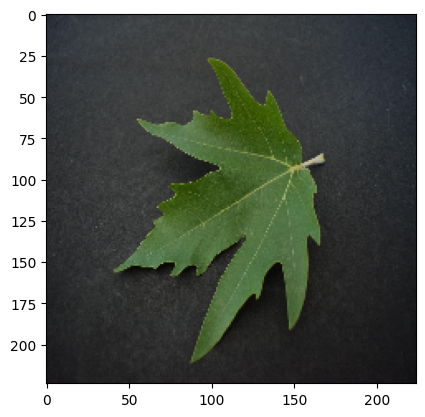

Predicted Class: Chinar


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = '/content/Leaf Dataset/Chinar/Chinar (100).JPG'
class_labels = ['Alstonia Scholaris', 'Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pomegranate', 'Pongamia Pinnata']
model = '/content/gdrive/MyDrive/Colab Notebooks/leaf_model.h5'

def predict_leaf_class(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction using the provided model
    prediction = cnn.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the image and print the predicted class
    plt.imshow(img)
    plt.show()
    print("Predicted Class:", predicted_class_label)


predict_leaf_class(img_path, model, class_labels)
